In [25]:
import pandas as pd

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

%matplotlib inline

In [30]:
#Read file into a list
fname = "/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/KeepUp Challenge/amazon-meta.txt"
with open(fname, encoding = 'utf8') as f:
    content = f.readlines()
#after reading the lines and separating with , trim the spaces out
content = [x.strip() for x in content] 
 
#Write to a new txt file using , as delimiter
#Write the content into file only when all information are available. Hence,
#If the data isn't complete it won't be written

file = open("testfile.txt","w", encoding='utf8') #open a new text file
columns = ['Id','ASIN', 'title', 'group','salesrank', 'categories', 'totalreviews', 'avgrating'] #setup the columns
for line in content: #loop through the lines stripped from the raw file
    lines = line.split(':')
    if lines[0] == "Id":
        if (len(columns) == 8):
            for component in columns[0:7]:
                file.write(component)
                file.write(',')
            file.write(columns[7])
            file.write("\n")
        columns = []
        columns.append(lines[1].strip())
         
    if lines[0] == "ASIN":
        columns.append(lines[1].strip())
        
    if lines[0] == "title":
        title = ':'.join(lines[1:]).strip().replace(',', ' ').replace('\n', ' ').strip()
        columns.append(title)
        
    if lines[0] == "group":
        columns.append(lines[1].strip())
        
    if lines[0] == "salesrank":
        columns.append(lines[1].strip()) 
        
    if lines[0] == "categories":
        columns.append(lines[1].strip())
        pattern = r'()'   
    if lines[0] == "reviews" and lines[1].strip() == "total":
        columns.append(lines[2].split(' ')[1])
        columns.append(lines[4].strip())
file.close()

In [35]:
content

['# Full information about Amazon Share the Love products',
 'Total items: 548552',
 '',
 'Id:   0',
 'ASIN: 0771044445',
 'discontinued product',
 '',
 'Id:   1',
 'ASIN: 0827229534',
 'title: Patterns of Preaching: A Sermon Sampler',
 'group: Book',
 'salesrank: 396585',
 'similar: 5  0804215715  156101074X  0687023955  0687074231  082721619X',
 'categories: 2',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Preaching[12368]',
 '|Books[283155]|Subjects[1000]|Religion & Spirituality[22]|Christianity[12290]|Clergy[12360]|Sermons[12370]',
 'reviews: total: 2  downloaded: 2  avg rating: 5',
 '2000-7-28  cutomer: A2JW67OY8U6HHK  rating: 5  votes:  10  helpful:   9',
 '2003-12-14  cutomer: A2VE83MZF98ITY  rating: 5  votes:   6  helpful:   5',
 '',
 'Id:   2',
 'ASIN: 0738700797',
 'title: Candlemas: Feast of Flames',
 'group: Book',
 'salesrank: 168596',
 'similar: 5  0738700827  1567184960  1567182836  0738700525  0738700940',
 'categories: 2

In [31]:
dfTest = pd.read_csv('/Users/acmilne/Documents/Python-Data-Science-and-Machine-Learning-Bootcamp/KeepUp Challenge/testfile.txt',sep=',')

In [32]:
dfTest.head()

,Id,ASIN,title,group,salesrank,categories,totalreviews,avgrating
0,1,0827229534,Patterns of Preaching: A Sermon Sampler,Book,396585,2,2,5.0
1,2,0738700797,Candlemas: Feast of Flames,Book,168596,2,12,4.5
2,3,0486287785,World War II Allied Fighter Planes Trading Cards,Book,1270652,1,1,5.0
3,4,0842328327,Life Application Bible Commentary: 1 and 2 Tim...,Book,631289,5,1,4.0
4,5,1577943082,Prayers That Avail Much for Business: Executive,Book,455160,2,0,0.0


In [33]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 542683 entries, 0 to 542682
Data columns (total 8 columns):
Id              542683 non-null int64
ASIN            542683 non-null object
title           542683 non-null object
group           542683 non-null object
salesrank       542683 non-null int64
categories      542683 non-null int64
totalreviews    542683 non-null int64
avgrating       542683 non-null float64
dtypes: float64(1), int64(4), object(3)
memory usage: 33.1+ MB


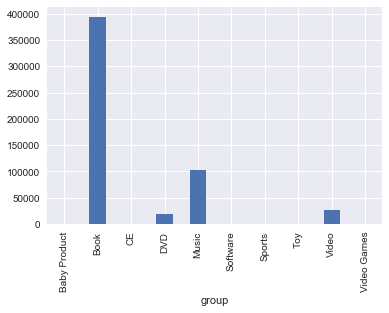

In [34]:
dfTest.groupby(['group'])['Id'].count().plot.bar()

In [37]:
dfTest.describe()

,Id,salesrank,categories,totalreviews,avgrating
count,542683.000000,5.426830e+05,542683.000000,542683.000000,542683.000000
mean,274413.707057,4.893252e+05,4.624602,14.339843,3.209531
std,158454.188293,5.677231e+05,4.450651,74.768436,1.996296
min,1.000000,-1.000000e+00,0.000000,0.000000,0.000000
25%,137161.500000,9.074400e+04,2.000000,0.000000,0.000000
50%,274427.000000,3.004930e+05,4.000000,2.000000,4.000000
75%,411673.500000,6.720695e+05,6.000000,8.000000,5.000000
max,548550.000000,3.798351e+06,116.000000,5545.000000,5.000000


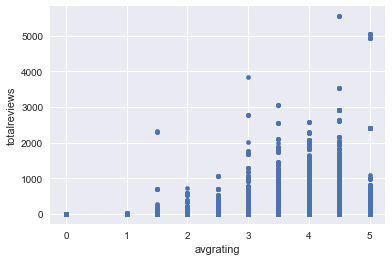

In [46]:
dfTest.plot(x='avgrating',y='totalreviews',kind='scatter')